### Data Description



*   pregnancies-number of time the patient got pregnant
*   glucose- plasma glucose concentration


*   blood-pressure - diastolic blood pressure(mmHg)
*   skin thickness-triceps skin fold thickness

*   insulin- 2 hour serum insulin
*   bmi-body mass index

*  diabetes pedigree function


*   age
*   outcome:class variable(0 or 1)











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head(5)
#head function is used to see first defined number of rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail(7)
#tail function is used to see last defined number of rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.columns
#to see name of column present

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.shape

(768, 9)

## Missing value

In [ ]:
data.info()
#quick insight from the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().any()
#to see if there is any null value present in any column

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data.describe()
#this help us to see statistical value and description of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the above description of data,we can see the columns-Pregnancies,Glucoe,Blood Pressure,skin thickness,Insulin and BMI have minimum  value of zero which is not possible.It may possible for pregnancy to be zero.
# Treating missing values


*   The 0 in the column should be replace with the median,since median is the least affected by the outliers




In [ ]:
#replacing 0 with nan,the records that have 0's in column Glucose,Blood Pressure,skin thickness,insulin,BMI will be replaced by NAN
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)

In [ ]:
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)

In [ ]:
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)

In [ ]:
data['Insulin']=data['Insulin'].replace(0,np.nan)

In [ ]:
data['BMI']=data['BMI'].replace(0,np.nan)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#count of nan value in dataset
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### As inferred columns glucose,BP,skin thickness,insulin,BMI have missing data 

*   glucose,BP and BMI have less number of miss data
*   but skin thickness and insulin have very high number of missing data which can result in wrong prediction
###Removing this from our dataset is not advisable so we will replace this missing data with the median of their respective column.



In [ ]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
data.fillna(data.median(),inplace=True)
#imputing missing values with their respective columns median

In [ ]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1


In [ ]:
print(data.isnull().sum())
#checking if null value has been imputed


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Outlier Detection and Treatment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

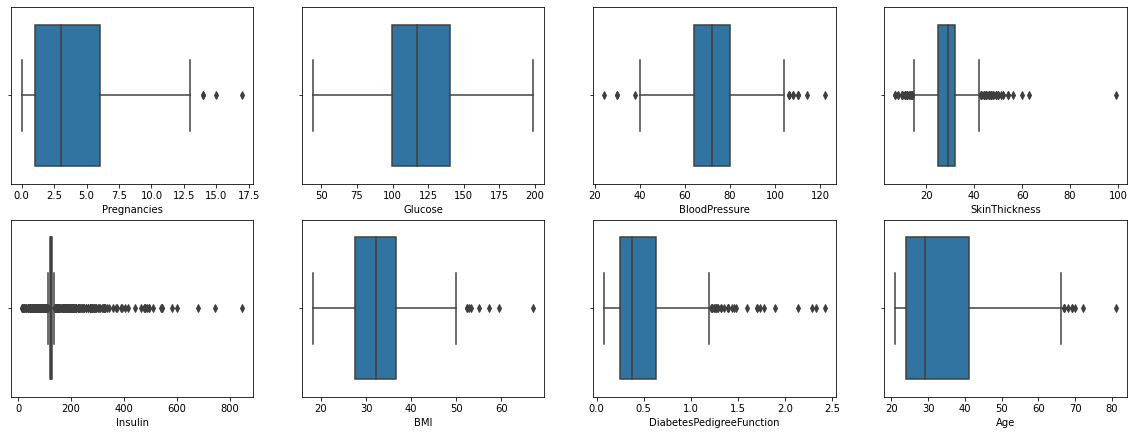

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])


plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])





### **Apart from glucose all the other attributes show presence of outliers.These lower level and upper level outlier will be replaced by 5th and 95th percentile respectively**

### nump.clip() function is used to clip(limit) the values in an array

In [ ]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper=data['Pregnancies'].quantile(0.95))

In [ ]:
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05),upper=data['BloodPressure'].quantile(0.95))

In [ ]:
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper=data['SkinThickness'].quantile(0.95))

In [ ]:
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05),upper=data['Insulin'].quantile(0.95))

In [ ]:
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05),upper=data['BMI'].quantile(0.95))

In [ ]:
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper=data['DiabetesPedigreeFunction'].quantile(0.95))

In [ ]:
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

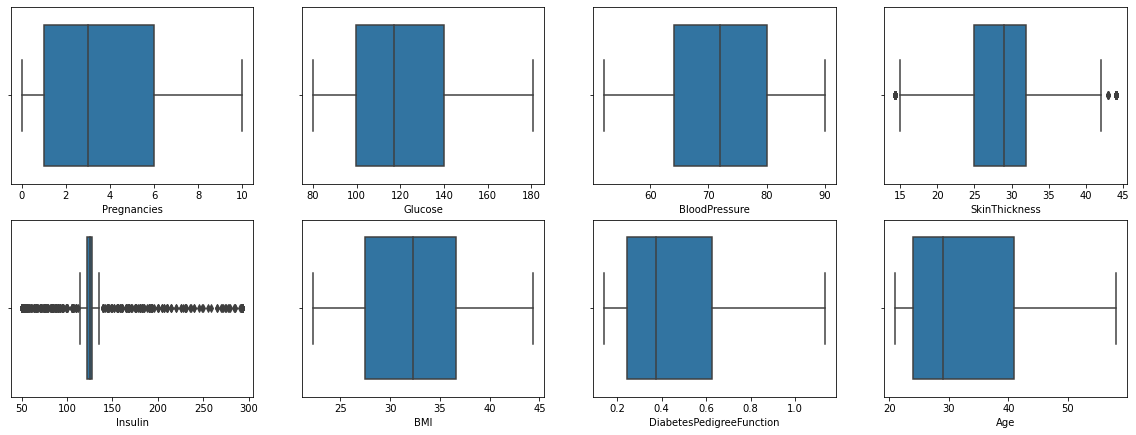

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])


plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])




In [ ]:
#We can see insulin and skinthickness still have outlier so we will try again this time but with 25 percentile and 75percentile
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.25),upper=data['Insulin'].quantile(0.75))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


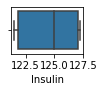

In [ ]:
plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

# **Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


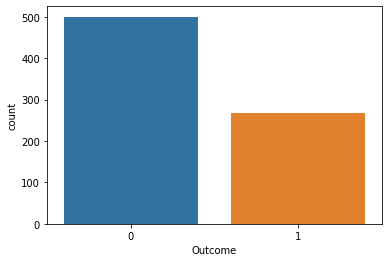

In [ ]:
sns.countplot(data['Outcome'])

In [ ]:
#seperating the data and labels
x = data.drop(columns='Outcome',axis=1)
y= data['Outcome']

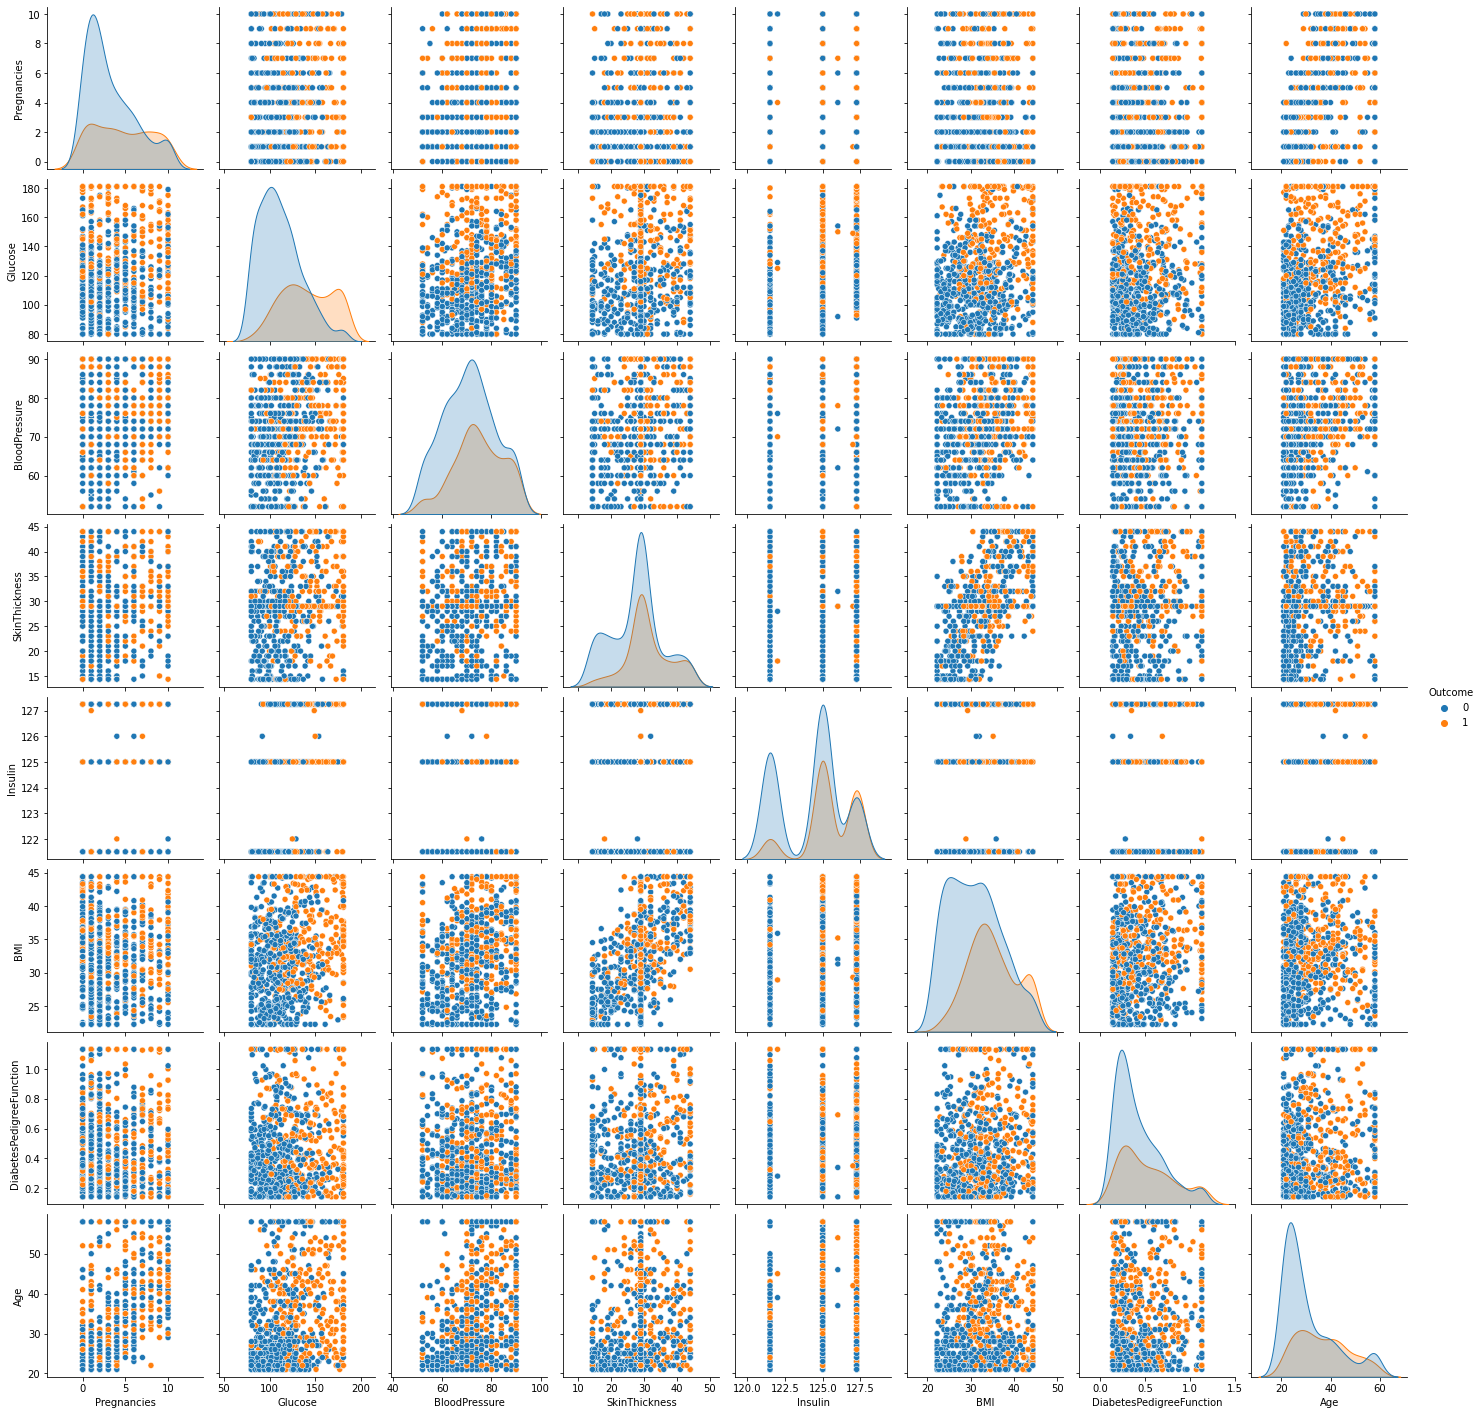

In [ ]:
p=sns.pairplot(data, hue = 'Outcome')

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0   125.00  33.6   
1            1.0     85.0           66.0           29.0   125.00  26.6   
2            8.0    181.0           64.0           29.0   125.00  23.3   
3            1.0     89.0           66.0           23.0   121.50  28.1   
4            0.0    137.0           52.0           35.0   127.25  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           44.0   127.25  32.9   
764          2.0    122.0           70.0           27.0   125.00  36.8   
765          5.0    121.0           72.0           23.0   121.50  26.2   
766          1.0    126.0           60.0           29.0   125.00  30.1   
767          1.0     93.0           70.0           31.0   125.00  30.4   

     DiabetesPedigreeFunction   Age  
0                     0.62700  50.0  
1                     0.35100  31.0

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standarization

In [ ]:
#standarizing data- to make a common range of data
scaler=StandardScaler()

In [ ]:
scaler.fit(x)


StandardScaler()

In [ ]:
standarized_data =scaler.transform(x)

In [ ]:
print(standarized_data)

[[ 0.72322585  0.91852319 -0.01522123 ...  0.2053362   0.61389087
   1.54987416]
 [-0.87838157 -1.27656849 -0.59013469 ... -0.9254295  -0.38399274
  -0.17744301]
 [ 1.36386882  2.06833312 -0.7817725  ... -1.45850475  0.77658928
  -0.08653158]
 ...
 [ 0.40290437 -0.02223038 -0.01522123 ... -0.99004468 -0.76723789
  -0.26835444]
 [-0.87838157  0.15198324 -1.16504814 ... -0.36004665 -0.39122378
   1.27713987]
 [-0.87838157 -0.99782668 -0.20685905 ... -0.31158526 -0.51415147
  -0.90473446]]


In [ ]:
x=standarized_data
y=data['Outcome']

# Test,Train and Split

In [ ]:
x_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


## *Training the model*

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the svm model
classifier.fit(x_train,Y_train)

SVC(kernel='linear')

#Model Evaluation## 

In [ ]:
#accuracy score
x_train_prediction =classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,Y_train)
print('Accuracy score of Training data:',training_data_accuracy)

Accuracy score of Training data: 0.762214983713355


In [ ]:
#accuracy score on test data
x_test_prediction =classifier.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score of Test data:',test_data_accuracy)

Accuracy score of Test data: 0.7597402597402597


### we can see accuracy score on test and train data are quite similar ,which refer they are not over trained or under trained

In [ ]:
#Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,Y_train.ravel())

RandomForestClassifier(random_state=10)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predict_train_data)))

Accuracy = 0.773


In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y.ravel(),cv=10)
score

array([0.71428571, 0.77922078, 0.74025974, 0.67532468, 0.7012987 ,
       0.72727273, 0.76623377, 0.79220779, 0.69736842, 0.84210526])

In [ ]:
score.mean()

0.7435577580314423